In [1]:
!pip install praw
!pip install wordcloud

                                              0.0/191.0 kB ? eta -:--:--
     -------------------------------------- 191.0/191.0 kB 3.8 MB/s eta 0:00:00


                                              0.0/300.2 kB ? eta -:--:--
     --------------------                   163.8/300.2 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00


In [2]:
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression
user_agent = 'to fetch and analysis'
reddit = praw.Reddit(
 client_id = '6fx2pfa7_lNbIr7qlI9y6A',
  client_secret = '230-pSd-ILe2bDbIcIeSVFKLw3DK2A',
 user_agent=user_agent
)

In [3]:
def headlines(p_name):
    # Define the subreddit you want to search in
    subreddit = reddit.subreddit('politics')

    # Define the hashtag you want to search for
    hashtag = f'#{p_name}'
    headlines = set()
    # Search for submissions containing the hashtag
    for submission in subreddit.search(hashtag, time_filter='all', limit=500):
        headlines.add(submission.title)
    return headlines

In [4]:
def preprocess_text(p_name):
    headlines_set = headlines(p_name)

    # Convert the set of headlines into a list
    headlines_list = list(headlines_set)

    # Preprocess each headline
    preprocessed_headlines = []
    for headline in headlines_list:
        # Remove URLs, HTML tags, emojis, and emoticons using regex
        text = re.sub(r'http\S+|www\S+|<[^>]*>|[\U00010000-\U0010ffff]', '', headline)

        # Remove punctuation and special characters using regex
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Remove short words (length < 3) and long words (length > 15) using regex
        text = re.sub(r'\b\w{1,2}\b|\b\w{16,}\b', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        preprocessed_headlines.append(text)

    return preprocessed_headlines

In [5]:
# appending all the headlines scrapped into a dataframe for a specific politician
df_biden = pd.DataFrame(preprocess_text("biden"), columns=['Headline'])
df_trump = pd.DataFrame(preprocess_text("trump"), columns=['Headline'])
df_kennedy = pd.DataFrame(preprocess_text("kennedy"), columns=['Headline'])
df_west = pd.DataFrame(preprocess_text("west"), columns=['Headline'])
df_stein = pd.DataFrame(preprocess_text("stein"), columns=['Headline'])

In [7]:
print(df_biden.describe())
print('------------------------------------------------------------')
print(df_trump.describe())
print('------------------------------------------------------------')
print(df_kennedy.describe())
print('------------------------------------------------------------')
print(df_west.describe())
print('------------------------------------------------------------')
print(df_stein.describe())

                                                 Headline
count                                                 237
unique                                                237
top     Biden Nobody intelligent can deny the impact c...
freq                                                    1
------------------------------------------------------------
                                                 Headline
count                                                 244
unique                                                244
top     Biden baits Trump into debate trap Joe Biden b...
freq                                                    1
------------------------------------------------------------
                                                 Headline
count                                                 223
unique                                                223
top     Robert Kennedy attacks Bidens disaster border ...
freq                                                    1
--------

In [8]:
print(df_biden.head())
print('------------------------------------------------------------')
print(df_trump.head())
print('------------------------------------------------------------')
print(df_kennedy.head())
print('------------------------------------------------------------')
print(df_west.head())
print('------------------------------------------------------------')
print(df_stein.head())

                                            Headline
0  Biden Nobody intelligent can deny the impact c...
1  Biden baits Trump into debate trap Joe Biden b...
2  Joe Biden suddenly leads Donald Trump multiple...
3  Nikki Haley Donors Switch Joe Biden Over Donal...
4  Biden campaign announces will target flipping ...
------------------------------------------------------------
                                            Headline
0  Biden baits Trump into debate trap Joe Biden b...
1  Joe Biden suddenly leads Donald Trump multiple...
2  Nikki Haley Donors Switch Joe Biden Over Donal...
3  Joe Biden crushes Donald Trump new swing state...
4  Trump lawyer suggests arresting Trump instead ...
------------------------------------------------------------
                                            Headline
0  Robert Kennedy attacks Bidens disaster border ...
1              Really Hate When Robert Kennedy Right
2  Trump Melania will not attend Kennedy Center h...
3              Kennedy Vows Cu

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(headline_df):
    text = ' '.join(headline_df['Headline'])  # Concatenate all texts from the specified column
    # Generate word cloud
    wordcloud = WordCloud(width=1000, height=600, max_words=100,
                          stopwords=STOPWORDS,
                          background_color="black").generate(text)
    # Display the generated image
    plt.figure(figsize=(20, 10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

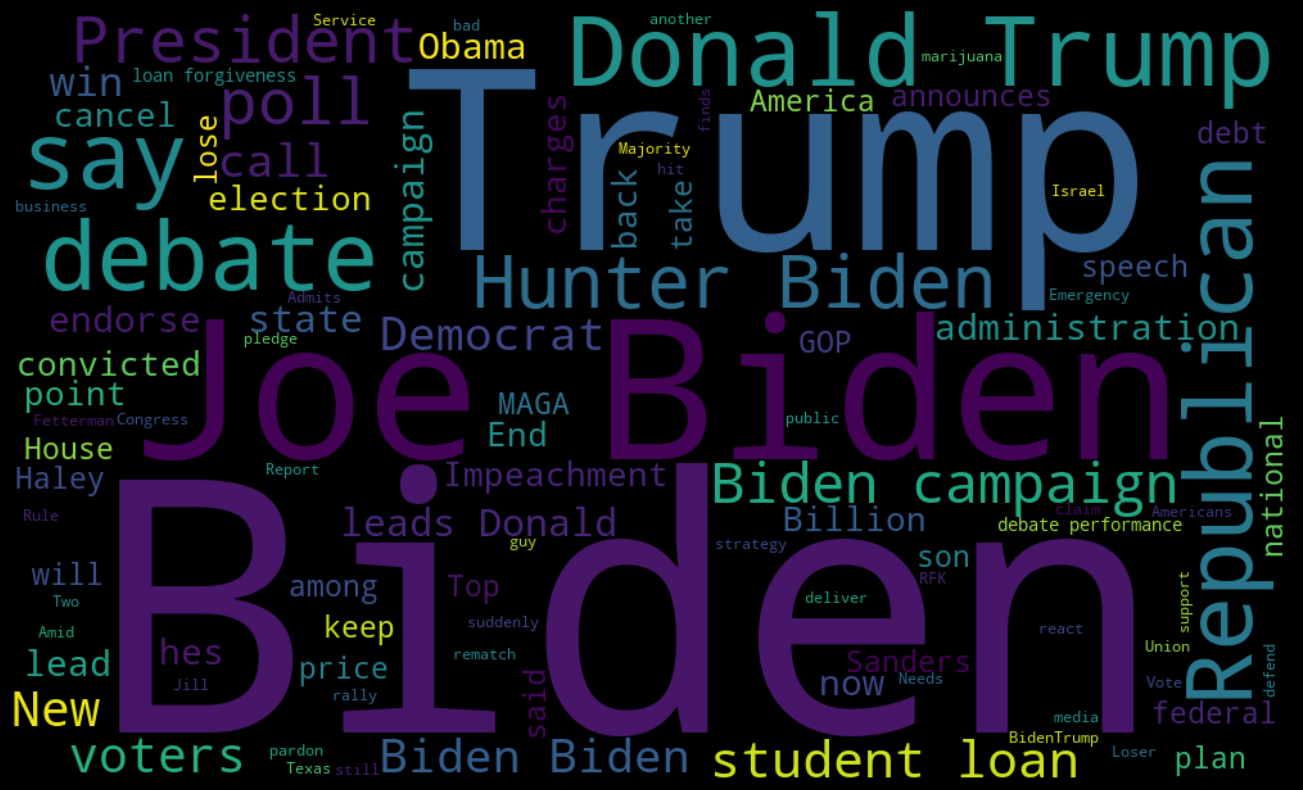

In [10]:
generate_word_cloud(df_biden)

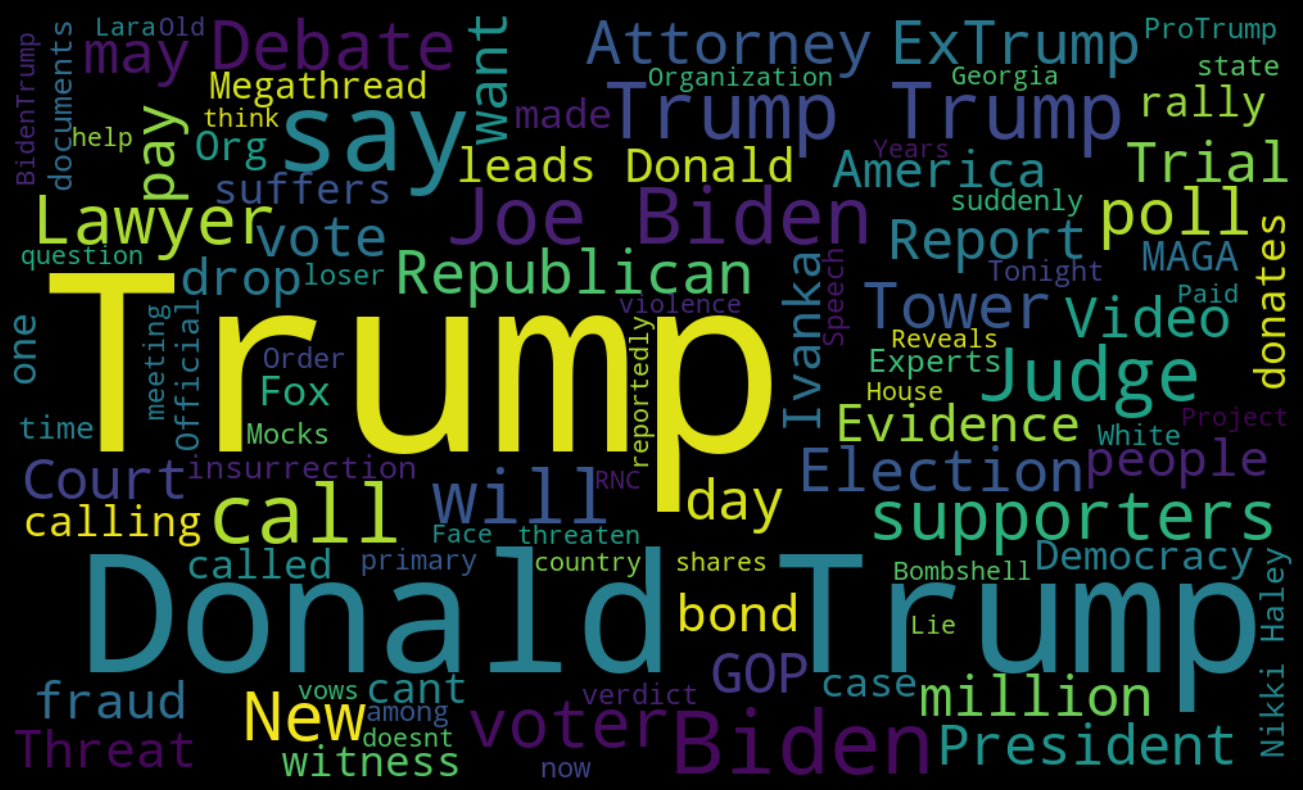

In [11]:
# Call the function with TRUMP DataFrame
generate_word_cloud(df_trump)

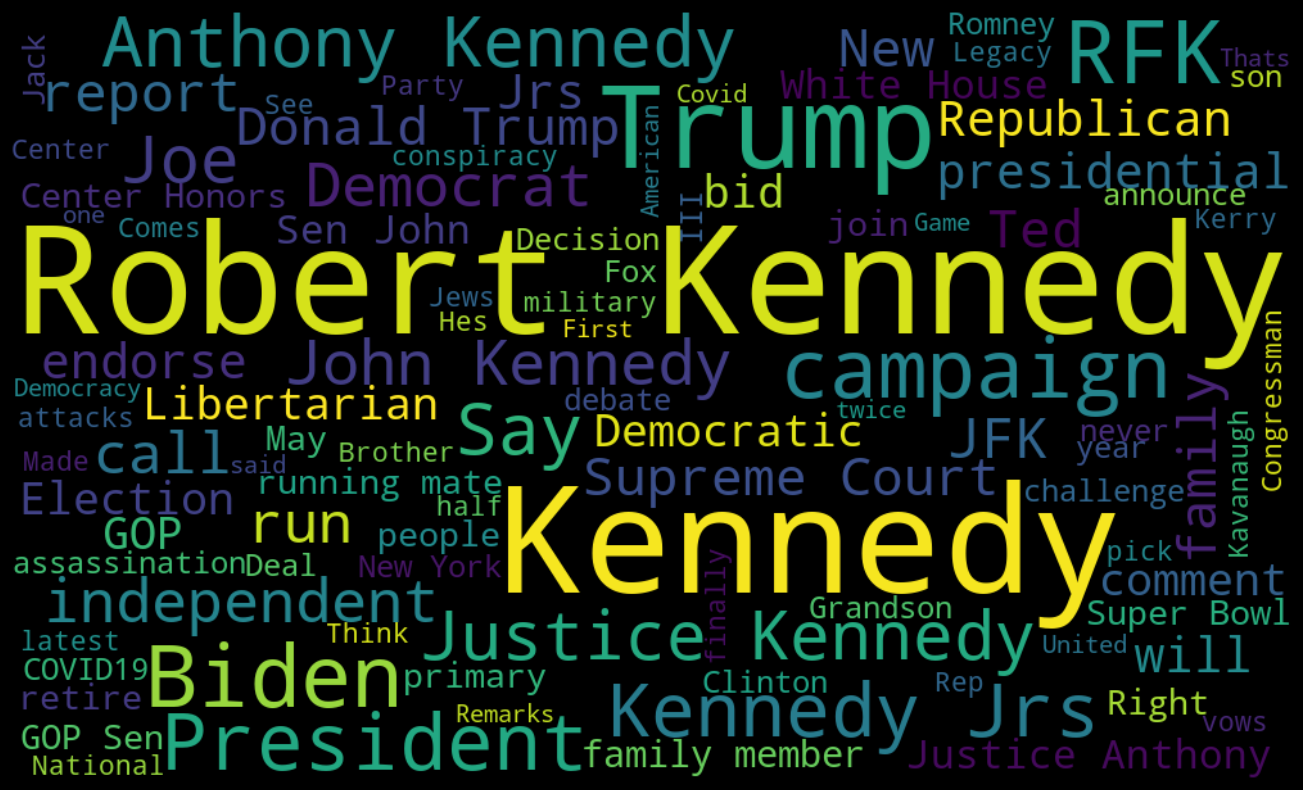

In [12]:
# Call the function with KENNEDY DataFrame
generate_word_cloud(df_kennedy)

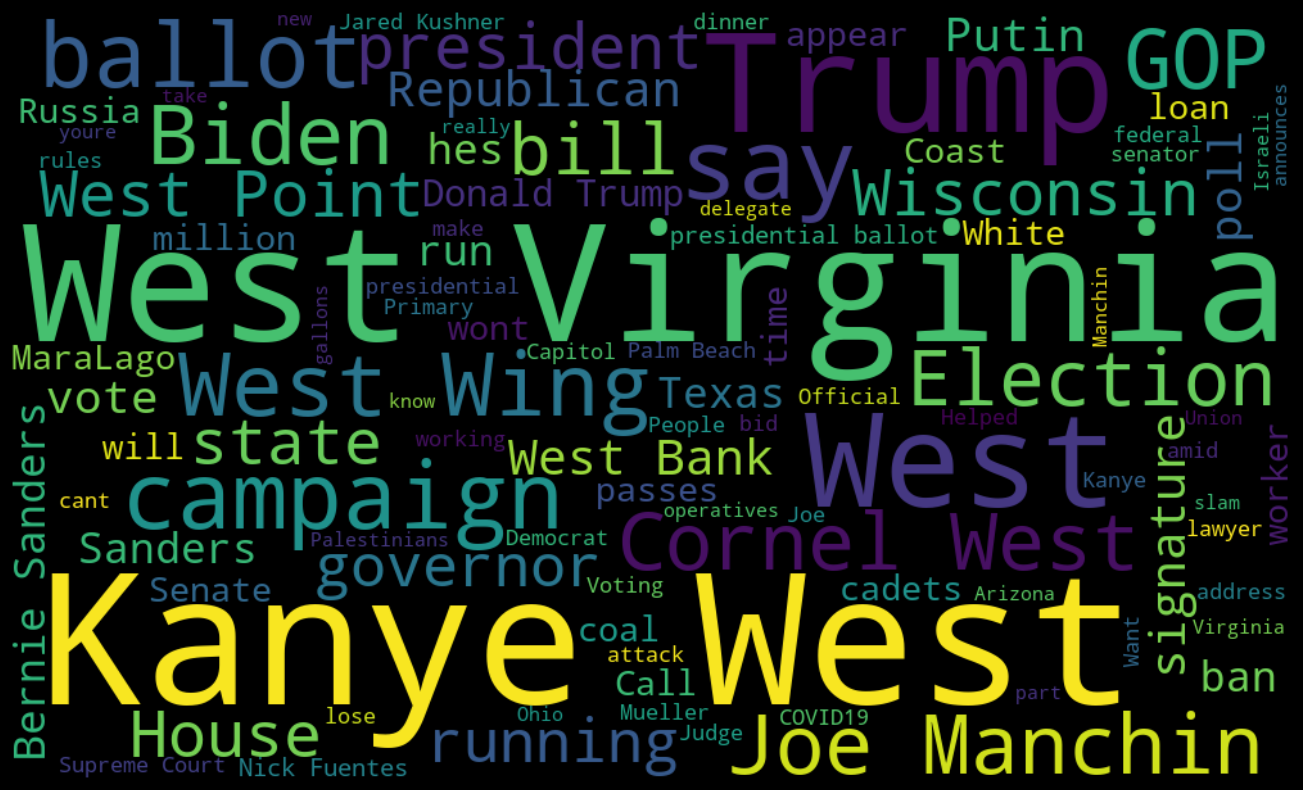

In [13]:

# Call the function with WEST DataFrame
generate_word_cloud(df_west)

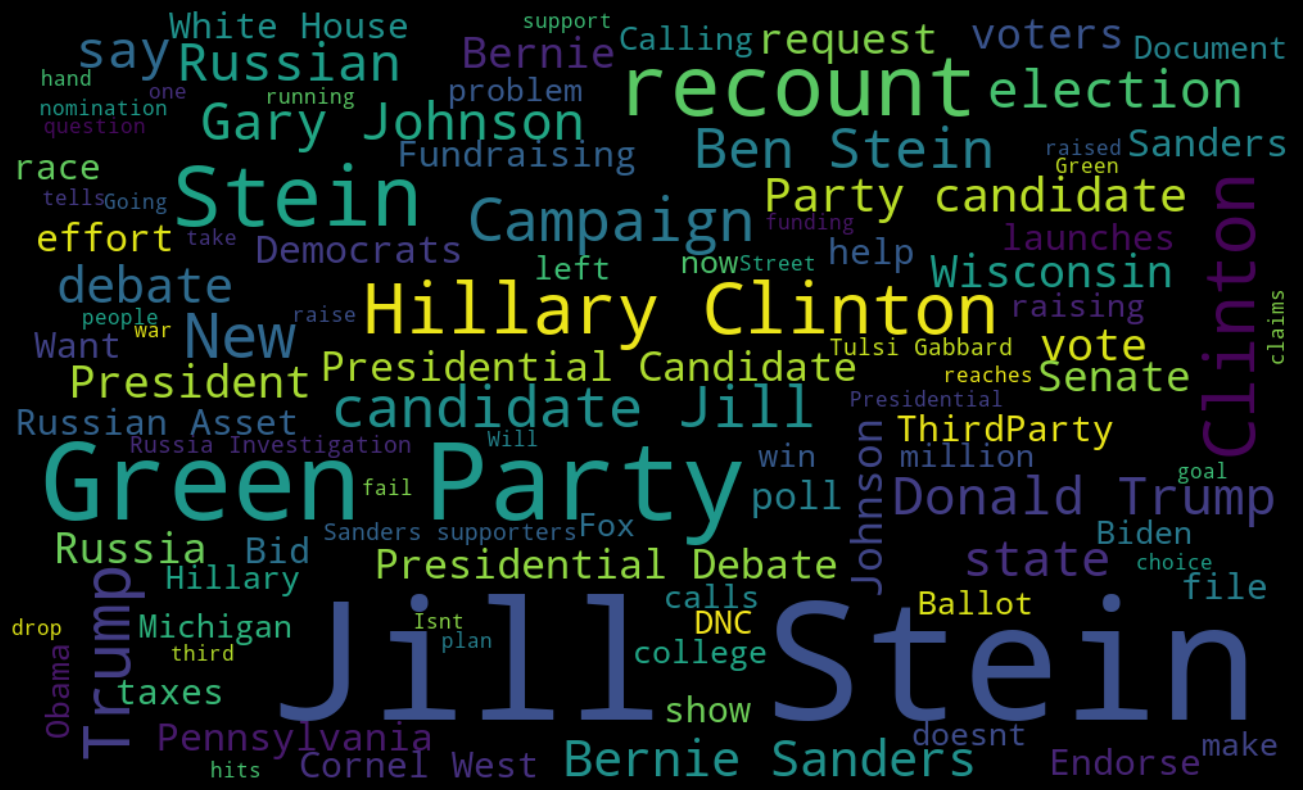

In [14]:
# Call the function with STEIN DataFrame
generate_word_cloud(df_stein)

In [15]:
!pip install textblob
from textblob import TextBlob


#function to calculate the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity

#function to calculate the Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity

                                              0.0/626.3 kB ? eta -:--:--
     -------------------                    327.7/626.3 kB 9.9 MB/s eta 0:00:01
     ------------------------------------- 626.3/626.3 kB 13.1 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     ----------------------                   0.8/1.5 MB 27.1 MB/s eta 0:00:01
     -------------------------------          1.2/1.5 MB 19.2 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [16]:
df_biden['Subjectivity'] = df_biden['Headline'].apply(getSubjectivity)
df_biden['Polarity'] = df_biden['Headline'].apply(getPolarity)
df_biden.head()

# TRUMP
df_trump['Subjectivity'] = df_trump['Headline'].apply(getSubjectivity)
df_trump['Polarity'] = df_trump['Headline'].apply(getPolarity)
df_trump.head()

# KENNEDY
df_kennedy['Subjectivity'] = df_kennedy['Headline'].apply(getSubjectivity)
df_kennedy['Polarity'] = df_kennedy['Headline'].apply(getPolarity)
df_kennedy.head()

# WEST
df_west['Subjectivity'] = df_west['Headline'].apply(getSubjectivity)
df_west['Polarity'] = df_west['Headline'].apply(getPolarity)
df_west.head()

# STEIN
df_stein['Subjectivity'] = df_stein['Headline'].apply(getSubjectivity)
df_stein['Polarity'] = df_stein['Headline'].apply(getPolarity)
df_stein.head()

,Headline,Subjectivity,Polarity
0,Did Jill Stein Help Elect Donald Trump,0.9,0.8
1,Green Partys Jill Stein Why Bernie Sanders Sho...,0.3,-0.2
2,Jill Steins Campaign Has Turned Over Documents...,0.0,0.0
3,Jill Stein raising for recount states that wou...,0.9,0.8
4,Elected President Jill Stein Will Pardon NSA W...,0.0,0.0


In [17]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return "Negative"
 elif score == 0:
     return "Neutral"
 else:
     return "Positive"

#adding the Insight score of respective politician to the respective df

#BIDEN
df_biden['Sub_Insight'] = df_biden["Subjectivity"].apply(getInsight)
df_biden['Pol_Insight'] = df_biden["Polarity"].apply(getInsight)
df_biden.head()

# TRUMP
df_trump['Sub_Insight'] = df_trump["Subjectivity"].apply(getInsight)
df_trump['Pol_Insight'] = df_trump["Polarity"].apply(getInsight)
df_trump.head()

# KENNEDY
df_kennedy['Sub_Insight'] = df_kennedy["Subjectivity"].apply(getInsight)
df_kennedy['Pol_Insight'] = df_kennedy["Polarity"].apply(getInsight)
df_kennedy.head()

# WEST
df_west['Sub_Insight'] = df_west["Subjectivity"].apply(getInsight)
df_west['Pol_Insight'] = df_west["Polarity"].apply(getInsight)
df_west.head()

# STEIN
df_stein['Sub_Insight'] = df_stein["Subjectivity"].apply(getInsight)
df_stein['Pol_Insight'] = df_stein["Polarity"].apply(getInsight)
df_stein.head()


,Headline,Subjectivity,Polarity,Sub_Insight,Pol_Insight
0,Did Jill Stein Help Elect Donald Trump,0.9,0.8,Positive,Positive
1,Green Partys Jill Stein Why Bernie Sanders Sho...,0.3,-0.2,Positive,Negative
2,Jill Steins Campaign Has Turned Over Documents...,0.0,0.0,Neutral,Neutral
3,Jill Stein raising for recount states that wou...,0.9,0.8,Positive,Positive
4,Elected President Jill Stein Will Pardon NSA W...,0.0,0.0,Neutral,Neutral


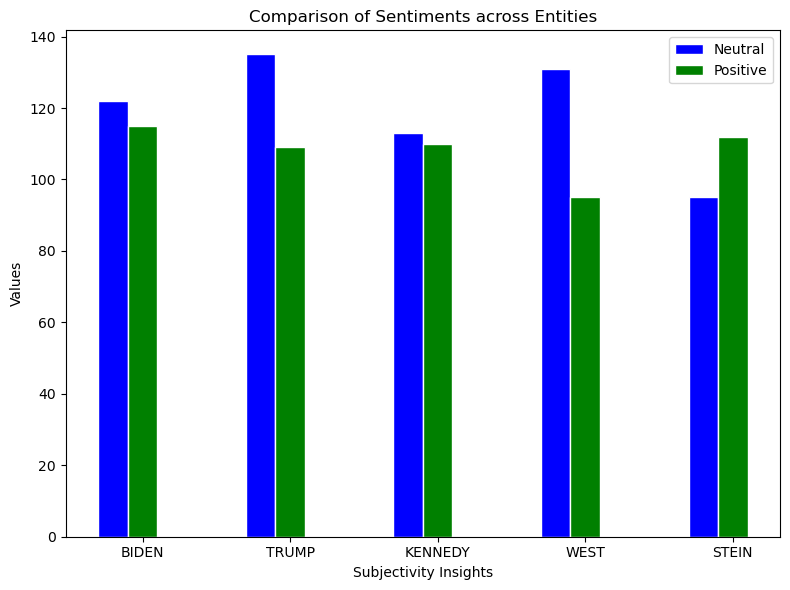

In [18]:
import matplotlib.pyplot as plt
import numpy as np

neu_combined = [df_biden[df_biden['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_trump[df_trump['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_kennedy[df_kennedy['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_west[df_west['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_stein[df_stein['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0]]


pos_combined = [df_biden[df_biden['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_trump[df_trump['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_kennedy[df_kennedy['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_west[df_west['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_stein[df_stein['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0]]

# Labels for the x-axis
labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]

# Create the bar plots
plt.figure(figsize=(8, 6))

# Loop through each sentiment list and plot its corresponding bar graph
plt.bar(r1, neu_combined, color='b', width=bar_width, edgecolor='white', label='Neutral')
plt.bar(r2, pos_combined, color='g', width=bar_width, edgecolor='white', label='Positive')

# Add labels and title
plt.xlabel('Subjectivity Insights')
plt.ylabel('Values')
plt.title('Comparison of Sentiments across Entities')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
def calculate_percentage(a,b):
    total = a+b
    neg_percen = (a/total)* 100
    pos_percen = (b/total)* 100
    print(neg_percen,pos_percen)

biden_li = calculate_percentage(neu_combined[0],pos_combined[0])
# labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

51.47679324894515 48.52320675105485


In [20]:
trump_li = calculate_percentage(neu_combined[1],pos_combined[1])

55.32786885245902 44.67213114754098


In [21]:
kennedy_li = calculate_percentage(neu_combined[2],pos_combined[2])

50.672645739910315 49.327354260089685


In [22]:
west_li = calculate_percentage(neu_combined[3],pos_combined[3])

57.9646017699115 42.0353982300885


In [23]:
stein_li = calculate_percentage(neu_combined[4],pos_combined[4])

45.893719806763286 54.106280193236714


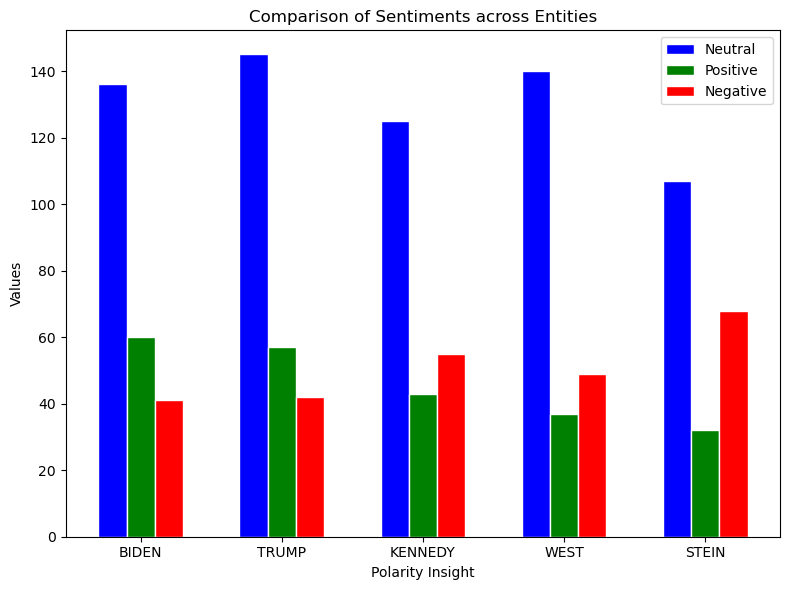

In [24]:
import matplotlib.pyplot as plt
import numpy as np

neu_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Neutral']),
                len(df_trump[df_trump['Pol_Insight'] == 'Neutral']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Neutral']),
                len(df_west[df_west['Pol_Insight'] == 'Neutral']),
                len(df_stein[df_stein['Pol_Insight'] == 'Neutral'])]

neg_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Negative']),
                len(df_trump[df_trump['Pol_Insight'] == 'Negative']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Negative']),
                len(df_west[df_west['Pol_Insight'] == 'Negative']),
                len(df_stein[df_stein['Pol_Insight'] == 'Negative'])]

pos_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Positive']),
                len(df_trump[df_trump['Pol_Insight'] == 'Positive']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Positive']),
                len(df_west[df_west['Pol_Insight'] == 'Positive']),
                len(df_stein[df_stein['Pol_Insight'] == 'Positive'])]


# Labels for the x-axis
labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]  # Separate x positions for negative bars

# Create the bar plots
plt.figure(figsize=(8, 6))

# Loop through each sentiment list and plot its corresponding bar graph
plt.bar(r1, neu_combined, color='b', width=bar_width, edgecolor='white', label='Neutral')
plt.bar(r2, pos_combined, color='g', width=bar_width, edgecolor='white', label='Positive')
plt.bar(r3, neg_combined, color='r', width=bar_width, edgecolor='white', label='Negative')

# Add labels and title
plt.xlabel('Polarity Insight')
plt.ylabel('Values')
plt.title('Comparison of Sentiments across Entities')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
# plt.ylim(0, 1.1)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
print(labels)
print("------------------------------")
print("neu_combined: ", neu_combined)

print("-----------------------------------")

print("neg_combined: ", neg_combined)

print("----------------------------------")

print("pos_combined: ", pos_combined)

['BIDEN', 'TRUMP', 'KENNEDY', 'WEST', 'STEIN']
------------------------------
neu_combined:  [136, 145, 125, 140, 107]
-----------------------------------
neg_combined:  [41, 42, 55, 49, 68]
----------------------------------
pos_combined:  [60, 57, 43, 37, 32]
